In [ ]:
# ==========================
# SVM with 5-Fold Cross-Validation + Categorical Encoding (Google Colab)
# ==========================

# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from google.colab import files

# Step 2: Upload CSV
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Step 3: Encode target variable 'Attrition' if needed
if df['Attrition'].dtype == 'object':
    le_target = LabelEncoder()
    df['Attrition'] = le_target.fit_transform(df['Attrition'])  # Yes=1, No=0

# Step 4: Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 5: Encode all categorical (object-type) columns in X
label_enc = LabelEncoder()
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = label_enc.fit_transform(X[col])

# Step 6: Set up 5-Fold Stratified Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 7: Initialize metric lists
acc_list = []
prec_list = []
f1_list = []
auc_list = []

# Step 8: Cross-validation loop
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train SVM model (linear kernel)
    svm_model = SVC(kernel='linear', C=1.0, probability=True, random_state=42)
    svm_model.fit(X_train, y_train)

    # Predict
    y_pred = svm_model.predict(X_test)
    y_prob = svm_model.predict_proba(X_test)[:, 1]

    # Evaluation metrics
    acc_list.append(accuracy_score(y_test, y_pred))
    prec_list.append(precision_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_prob))

# Step 9: Print cross-validated metrics
print("\n📊 SVM Performance (5-Fold Cross-Validation):")
print(f"✅ Accuracy:  {np.mean(acc_list):.3f}")
print(f"✅ Precision: {np.mean(prec_list):.3f}")
print(f"✅ F1 Score:  {np.mean(f1_list):.3f}")
print(f"✅ AUC:       {np.mean(auc_list):.3f}")


Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition (1).csv

📊 SVM Performance (5-Fold Cross-Validation):
✅ Accuracy:  0.839
✅ Precision: 0.525
✅ F1 Score:  0.209
✅ AUC:       0.706


# **SVM with 5 Fold Cross Validation on a SMOTE Balanced Dataset**

Saving Balanced-Employee-Attrition.csv to Balanced-Employee-Attrition (1).csv

Checking for missing values:
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance       

<ipython-input-2-e0e3905f7cb3>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='C Value', y=metric, data=results_df, palette='Blues_d')


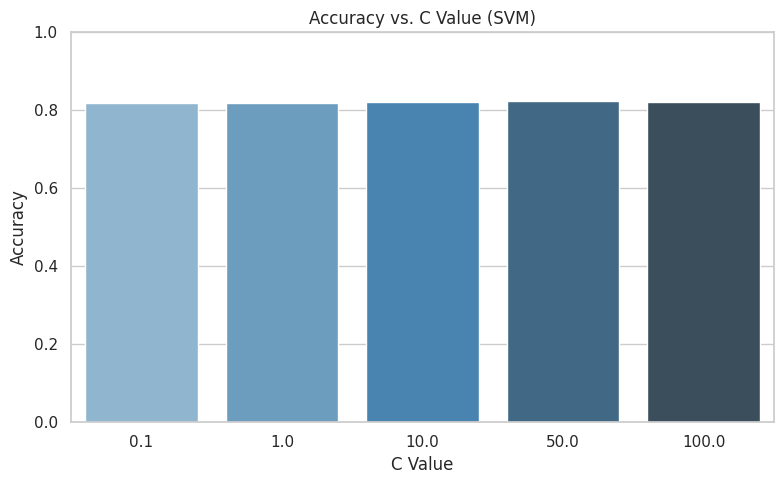

<ipython-input-2-e0e3905f7cb3>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='C Value', y=metric, data=results_df, palette='Blues_d')


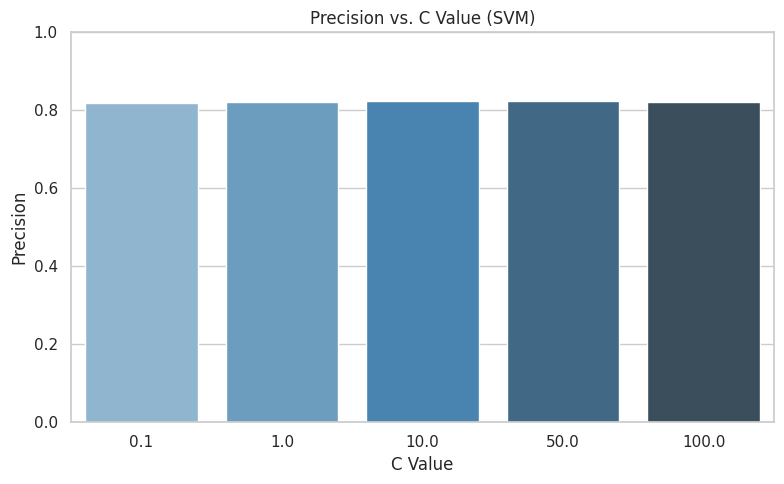

<ipython-input-2-e0e3905f7cb3>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='C Value', y=metric, data=results_df, palette='Blues_d')


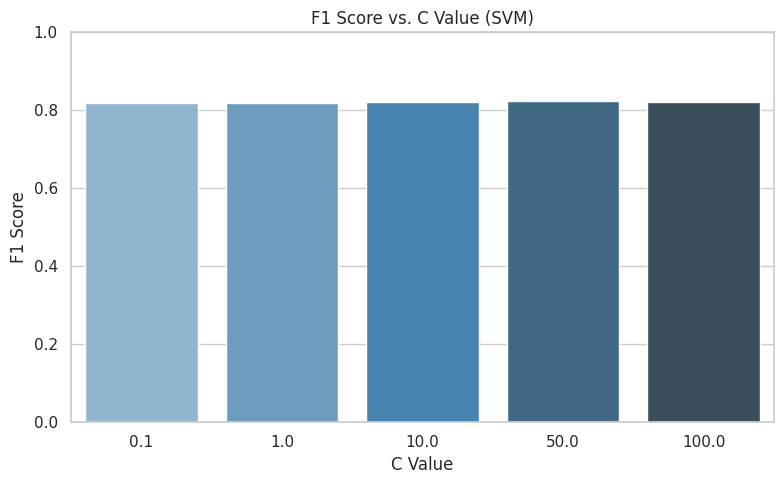

<ipython-input-2-e0e3905f7cb3>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='C Value', y=metric, data=results_df, palette='Blues_d')


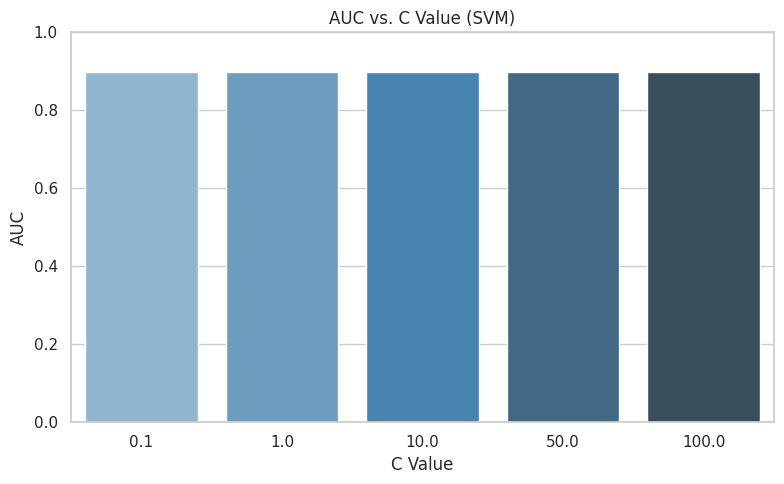

In [ ]:
# ==========================
# SVM Model Comparison with 5-Fold Cross-Validation for Different C Values + Visualization
# ==========================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Step 3: Check missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Step 4: Check class distribution
print("\nClass distribution:")
print(df['Attrition'].value_counts())

# Step 5: Encode target variable if needed
if df['Attrition'].dtype == 'object':
    le = LabelEncoder()
    df['Attrition'] = le.fit_transform(df['Attrition'])

# Step 6: Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 7: Set up different C values to test
C_values = [0.1, 1, 10, 50, 100]

# Store results for plotting
results = {
    'C Value': [],
    'Accuracy': [],
    'Precision': [],
    'F1 Score': [],
    'AUC': []
}

# Step 8: Define 5-Fold Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 9: Loop over C values
for c in C_values:
    print(f"\nEvaluating SVM with C={c}...")

    # Initialize SVM model
    svm_model = SVC(kernel='linear', C=c, probability=True, random_state=42)

    # Initialize lists for storing fold scores
    accuracy_list = []
    precision_list = []
    f1_list = []
    auc_list = []

    # Manual 5-Fold Cross Validation
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        svm_model.fit(X_train, y_train)
        y_pred = svm_model.predict(X_test)
        y_pred_prob = svm_model.predict_proba(X_test)[:, 1]

        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred))
        auc_list.append(roc_auc_score(y_test, y_pred_prob))

    # Save average scores for this C value
    results['C Value'].append(c)
    results['Accuracy'].append(np.mean(accuracy_list))
    results['Precision'].append(np.mean(precision_list))
    results['F1 Score'].append(np.mean(f1_list))
    results['AUC'].append(np.mean(auc_list))

# Step 10: Create a DataFrame from the results
results_df = pd.DataFrame(results)
print("\nSummary of results:")
print(results_df)

# ==========================
# Step 11: Visualization
# ==========================

# Set a Seaborn style
sns.set(style="whitegrid")

# Plot Accuracy, Precision, F1 Score, and AUC for different C values
metrics = ['Accuracy', 'Precision', 'F1 Score', 'AUC']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(x='C Value', y=metric, data=results_df, palette='Blues_d')
    plt.title(f'{metric} vs. C Value (SVM)')
    plt.ylim(0, 1)
    plt.xlabel('C Value')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()


# **KNN with 5 fold and SMOTE**

Saving Balanced-Employee-Attrition.csv to Balanced-Employee-Attrition (2).csv

Checking for missing values:
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance       

<ipython-input-4-3d6cb6cd262a>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='K Value', y=metric, data=results_knn_df, palette='Purples_d')


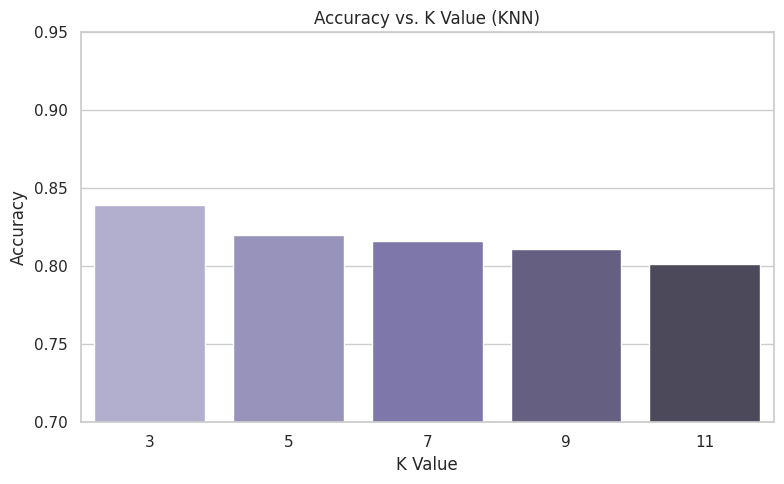

<ipython-input-4-3d6cb6cd262a>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='K Value', y=metric, data=results_knn_df, palette='Purples_d')


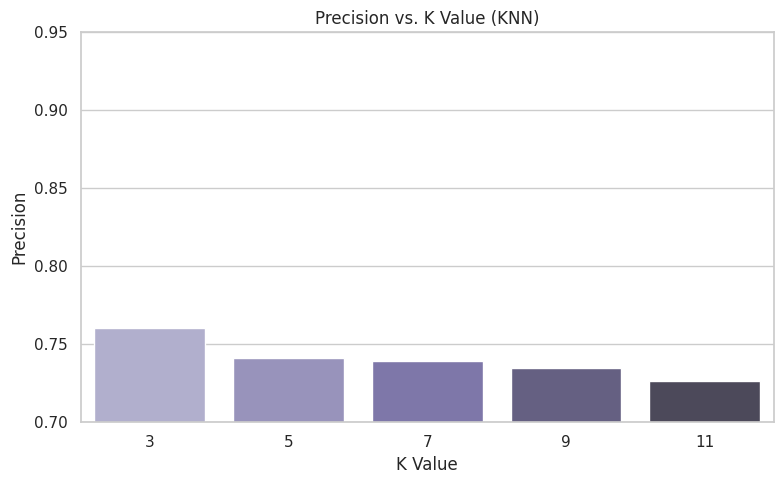

<ipython-input-4-3d6cb6cd262a>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='K Value', y=metric, data=results_knn_df, palette='Purples_d')


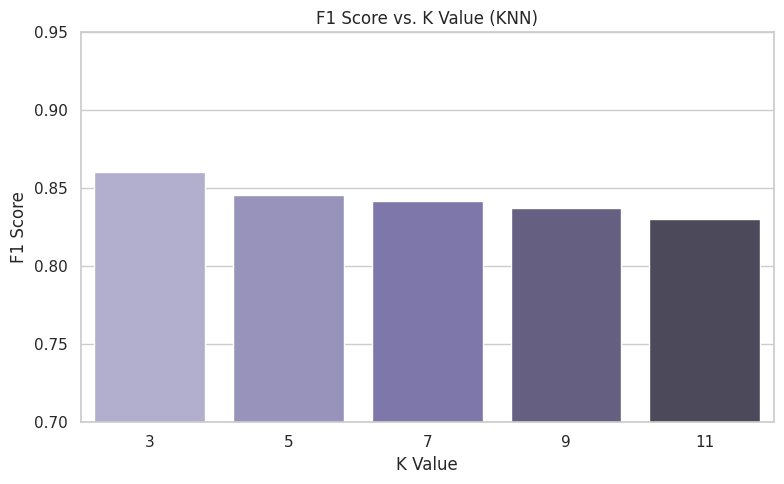

<ipython-input-4-3d6cb6cd262a>:103: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='K Value', y=metric, data=results_knn_df, palette='Purples_d')


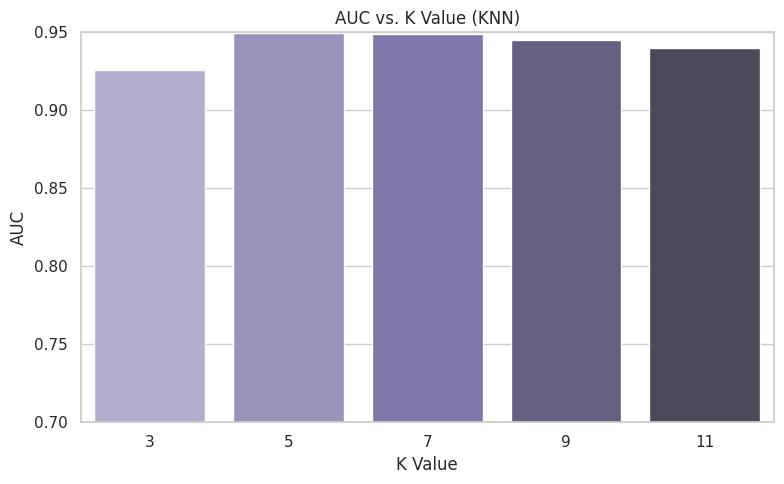

In [ ]:
# ==========================
# KNN Model Comparison with 5-Fold Cross-Validation for Different k Values + Visualization
# ==========================

# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Step 3: Check missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Step 4: Check class distribution
print("\nClass distribution:")
print(df['Attrition'].value_counts())

# Step 5: Encode target if necessary
if df['Attrition'].dtype == 'object':
    le = LabelEncoder()
    df['Attrition'] = le.fit_transform(df['Attrition'])

# Step 6: Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 7: Set different k values to test
k_values = [3, 5, 7, 9, 11]

# Store results for plotting
results = {
    'K Value': [],
    'Accuracy': [],
    'Precision': [],
    'F1 Score': [],
    'AUC': []
}

# Step 8: 5-Fold Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 9: Loop over different k values
for k in k_values:
    print(f"\nEvaluating KNN with k={k}...")

    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Lists to store scores
    accuracy_list = []
    precision_list = []
    f1_list = []
    auc_list = []

    # Perform manual 5-fold CV
    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        y_pred_prob = knn_model.predict_proba(X_test)[:, 1]

        accuracy_list.append(accuracy_score(y_test, y_pred))
        precision_list.append(precision_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred))
        auc_list.append(roc_auc_score(y_test, y_pred_prob))

    # Save average scores for this k
    results['K Value'].append(k)
    results['Accuracy'].append(np.mean(accuracy_list))
    results['Precision'].append(np.mean(precision_list))
    results['F1 Score'].append(np.mean(f1_list))
    results['AUC'].append(np.mean(auc_list))

# Step 10: Create results DataFrame
results_knn_df = pd.DataFrame(results)
print("\nSummary of KNN Results:")
print(results_knn_df)

# ==========================
# Step 11: Visualization
# ==========================

# Set Seaborn style
sns.set(style="whitegrid")

# Plot Accuracy, Precision, F1 Score, and AUC for different k values
metrics = ['Accuracy', 'Precision', 'F1 Score', 'AUC']

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(x='K Value', y=metric, data=results_knn_df, palette='Purples_d')
    plt.title(f'{metric} vs. K Value (KNN)')
    plt.ylim(0.70, 0.95)
    plt.xlabel('K Value')
    plt.ylabel(metric)
    plt.tight_layout()
    plt.show()


# **ENSEMBLE = SVM + KNN**

Saving Balanced-Employee-Attrition.csv to Balanced-Employee-Attrition (3).csv

Checking for missing values:
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance       

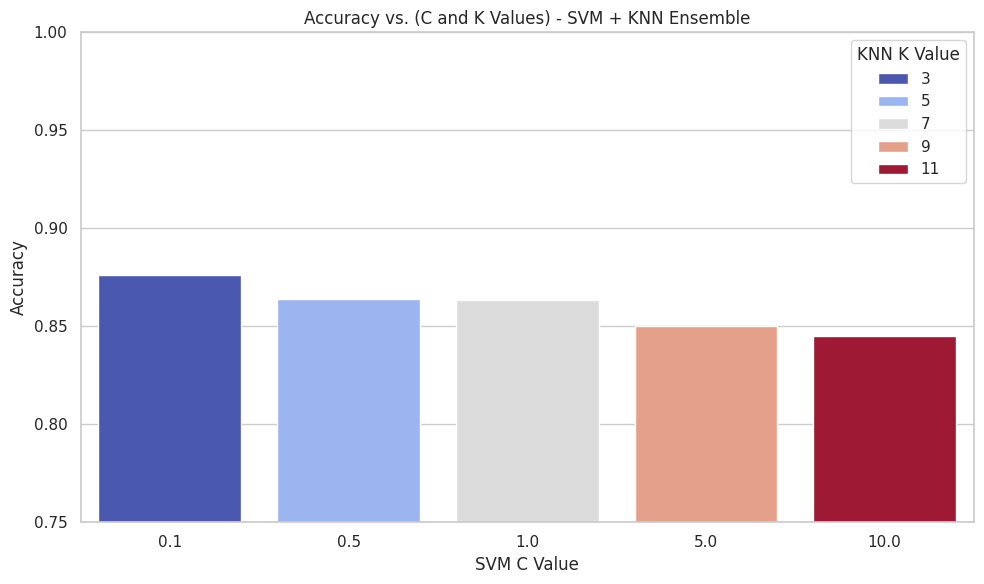

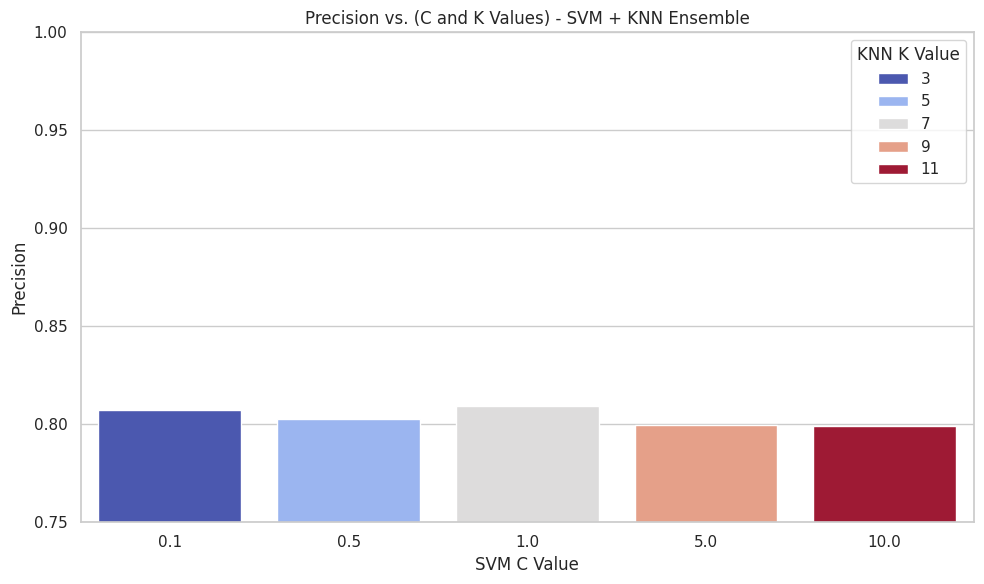

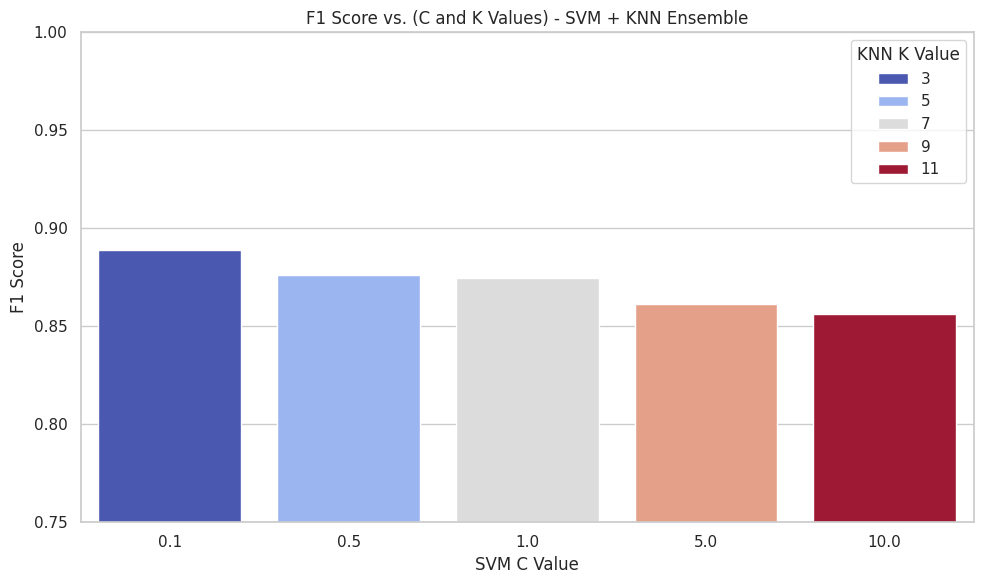

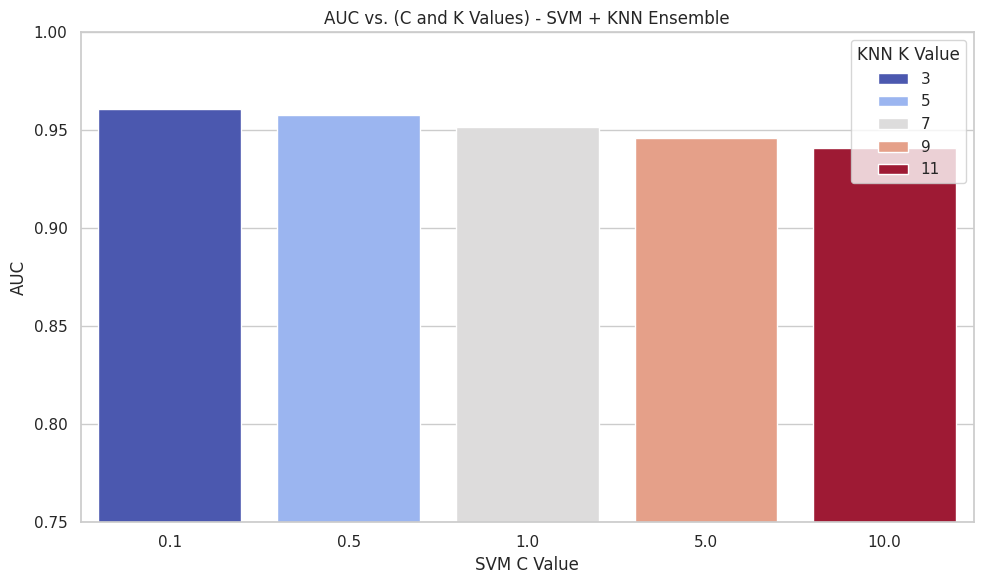

In [ ]:
# ==========================
# Expanded Ensemble (SVM + KNN) with 5 Hyperparameter Combinations + Visualization
# ==========================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Step 3: Check missing values
print("\nChecking for missing values:")
print(df.isnull().sum())

# Step 4: Check class distribution
print("\nClass distribution:")
print(df['Attrition'].value_counts())

# Step 5: Encode target variable if needed
if df['Attrition'].dtype == 'object':
    le = LabelEncoder()
    df['Attrition'] = le.fit_transform(df['Attrition'])

# Step 6: Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 7: Set 5 different hyperparameter combinations
combinations = [
    {'C': 0.1, 'K': 3},
    {'C': 0.5, 'K': 5},
    {'C': 1, 'K': 7},
    {'C': 5, 'K': 9},
    {'C': 10, 'K': 11}
]

# Prepare to store results
ensemble_results = {
    'C Value': [],
    'K Value': [],
    'Accuracy': [],
    'Precision': [],
    'F1 Score': [],
    'AUC': []
}

# Step 8: 5-Fold Stratified Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 9: Evaluate each combination
for combo in combinations:
    c = combo['C']
    k = combo['K']

    print(f"\nEvaluating Ensemble with SVM(C={c}) + KNN(K={k})...")

    # Initialize models
    svm_model = SVC(kernel='linear', C=c, probability=True, random_state=42)
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Create soft voting ensemble
    ensemble = VotingClassifier(
        estimators=[('svm', svm_model), ('knn', knn_model)],
        voting='soft'
    )

    # Lists to store metrics
    acc_list, prec_list, f1_list, auc_list = [], [], [], []

    for train_index, test_index in kf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        ensemble.fit(X_train, y_train)
        y_pred = ensemble.predict(X_test)
        y_pred_prob = ensemble.predict_proba(X_test)[:, 1]

        acc_list.append(accuracy_score(y_test, y_pred))
        prec_list.append(precision_score(y_test, y_pred))
        f1_list.append(f1_score(y_test, y_pred))
        auc_list.append(roc_auc_score(y_test, y_pred_prob))

    # Save average results
    ensemble_results['C Value'].append(c)
    ensemble_results['K Value'].append(k)
    ensemble_results['Accuracy'].append(np.mean(acc_list))
    ensemble_results['Precision'].append(np.mean(prec_list))
    ensemble_results['F1 Score'].append(np.mean(f1_list))
    ensemble_results['AUC'].append(np.mean(auc_list))

# Step 10: Create DataFrame
ensemble_df = pd.DataFrame(ensemble_results)
print("\nSummary of Ensemble Results:")
print(ensemble_df)

# ==========================
# Step 11: Visualization
# ==========================

# Set a style
sns.set(style="whitegrid")

# Plot all metrics one by one
metrics = ['Accuracy', 'Precision', 'F1 Score', 'AUC']

for metric in metrics:
    plt.figure(figsize=(10,6))
    sns.barplot(x='C Value', y=metric, hue='K Value', data=ensemble_df, palette='coolwarm')
    plt.title(f'{metric} vs. (C and K Values) - SVM + KNN Ensemble')
    plt.ylim(0.75, 1)
    plt.xlabel('SVM C Value')
    plt.ylabel(metric)
    plt.legend(title='KNN K Value')
    plt.tight_layout()
    plt.show()


Visualization for Ensemble

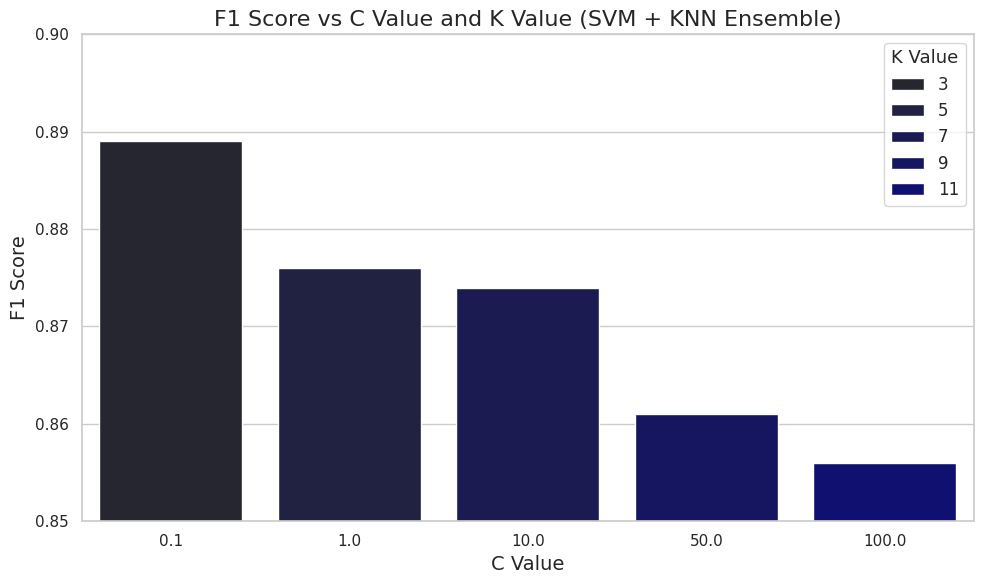

In [ ]:
# Create a custom dark navy color palette
palette = sns.dark_palette("navy", n_colors=5)

plt.figure(figsize=(10,6))
sns.barplot(x='C Value', y='F1 Score', hue='K Value', data=df, palette=palette)

plt.title('F1 Score vs C Value and K Value (SVM + KNN Ensemble)', fontsize=16)
plt.xlabel('C Value', fontsize=14)
plt.ylabel('F1 Score', fontsize=14)
plt.ylim(0.85, 0.90)
plt.legend(title='K Value', fontsize=12, title_fontsize=13)
plt.tight_layout()
plt.show()


# **K MEANS**

Saving Balanced-Employee-Attrition.csv to Balanced-Employee-Attrition (8).csv

First few rows:
        Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.446350               2   0.742527           2         -1.010909   
1  1.322365               1  -1.297775           1         -0.147150   
2  0.008343               2   1.414363           1         -0.887515   
3 -0.429664               1   1.461466           1         -0.764121   
4 -1.086676               2  -0.524295           1         -0.887515   

   Education  EducationField  EmployeeCount  EmployeeNumber  \
0          2               1            0.0       -1.701283   
1          1               1            0.0       -1.699621   
2          2               4            0.0       -1.696298   
3          4               1            0.0       -1.694636   
4          1               3            0.0       -1.691313   

   EnvironmentSatisfaction  ...  StandardHours  StockOptionLevel  \
0                        

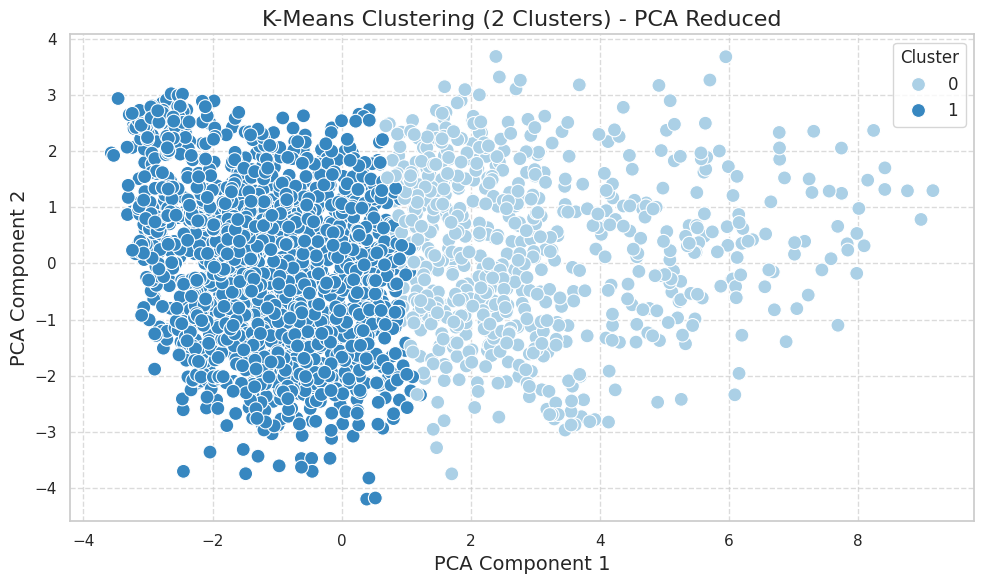

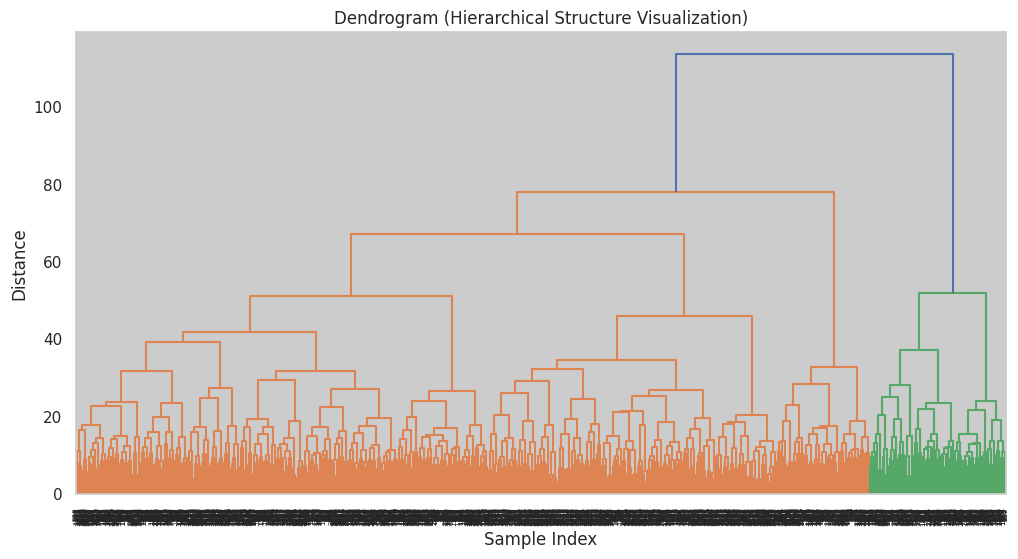

In [ ]:
# ==========================
# K-Means Clustering with 2 Clusters + Visualization
# ==========================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Step 3: Basic Data Checking
print("\nFirst few rows:")
print(df.head())

# Step 4: Drop target if present (Attrition), since unsupervised
if 'Attrition' in df.columns:
    df = df.drop('Attrition', axis=1)

# Step 5: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 6: Apply K-Means for 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Step 7: Add cluster labels to original data
df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels

# ==========================
# Step 8: Visualization of Clusters
# ==========================
# Step 8: Visualization of Clusters (Navy Blue Theme)

# Use PCA to reduce to 2D space for easy plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_clustered['PCA1'] = pca_result[:, 0]
df_clustered['PCA2'] = pca_result[:, 1]

# Plot clusters with a navy blue color theme
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clustered, x='PCA1', y='PCA2', hue='Cluster', palette='Blues', s=100)
plt.title('K-Means Clustering (2 Clusters) - PCA Reduced', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.legend(title='Cluster', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# ==========================
# Step 9: Optional: Dendrogram
# ==========================

# Build linkage matrix for Dendrogram
linked = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram (Hierarchical Structure Visualization)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


Saving Balanced-Employee-Attrition.csv to Balanced-Employee-Attrition.csv


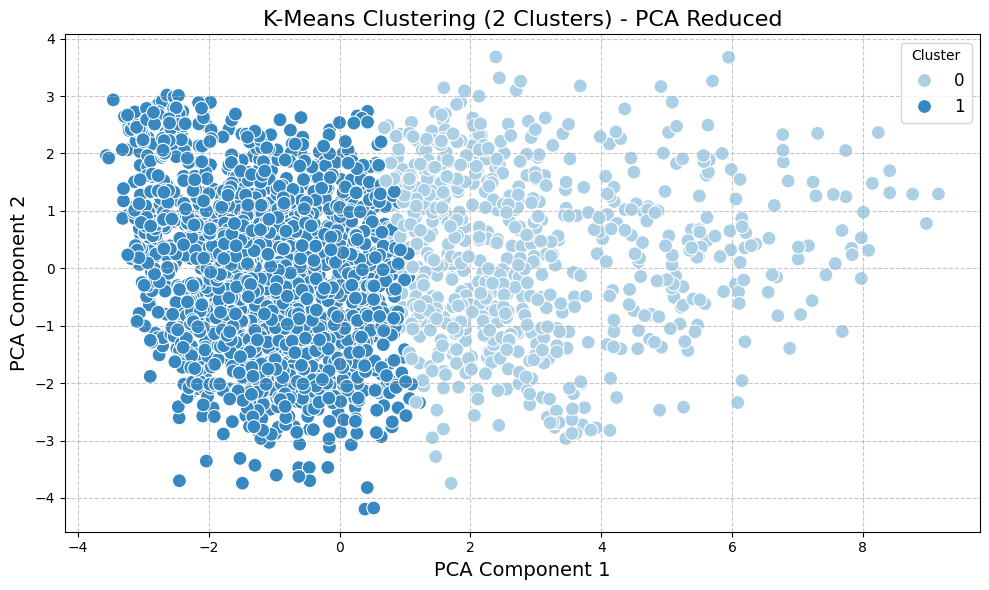

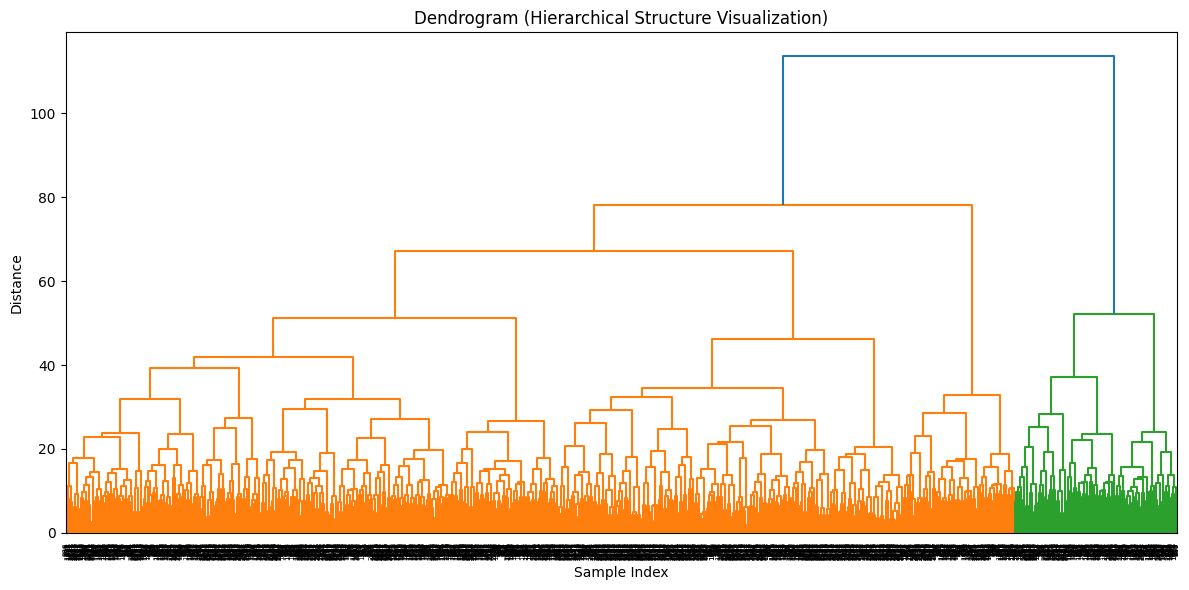


✅ Original labels align better with true Attrition.

🧠 Confusion Matrix (Actual vs Cluster):
[[ 496  737]
 [ 188 1045]]

✅ Matching Accuracy: 0.6249


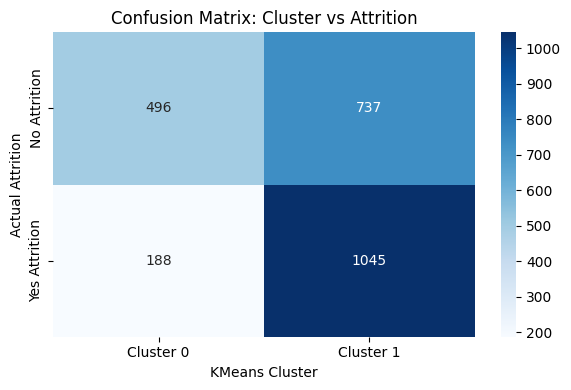


🔍 Interpretation: Cluster 1 likely represents ATTRITION = YES group.
                   Cluster 0 likely represents ATTRITION = NO group.

📊 Cluster-Attrition Match Confidence: ❌ Weak match — clustering does not reflect attrition well
📈 Accuracy Match %: 62.49%


In [ ]:
# ==========================
# FULL K-Means Clustering + Evaluation Against Attrition Labels
# ==========================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Step 3: Save full version before dropping 'Attrition'
df_full = df.copy()

# Step 4: Drop target for clustering (unsupervised)
if 'Attrition' in df.columns:
    df = df.drop('Attrition', axis=1)

# Step 5: Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Step 6: Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

# Step 7: PCA for 2D reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df_clustered = df.copy()
df_clustered['Cluster'] = cluster_labels
df_clustered['PCA1'] = pca_result[:, 0]
df_clustered['PCA2'] = pca_result[:, 1]

# ==========================
# Step 8: Cluster Visualization (Blues Palette)
# ==========================
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_clustered, x='PCA1', y='PCA2', hue='Cluster', palette='Blues', s=100)
plt.title('K-Means Clustering (2 Clusters) - PCA Reduced', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=14)
plt.ylabel('PCA Component 2', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cluster', fontsize=12)
plt.tight_layout()
plt.show()

# ==========================
# Step 9: Dendrogram
# ==========================
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram (Hierarchical Structure Visualization)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# ==========================
# Step 10: Evaluation vs True Attrition
# ==========================

# Actual Attrition labels
actual = df_full['Attrition'].values

# Compare both original and flipped cluster labels
flipped_labels = 1 - cluster_labels
acc_original = accuracy_score(actual, cluster_labels)
acc_flipped = accuracy_score(actual, flipped_labels)

# Choose the better one
if acc_flipped > acc_original:
    best_labels = flipped_labels
    flipped = True
    print("\n🌀 Flipped labels gave better match with true Attrition.")
else:
    best_labels = cluster_labels
    flipped = False
    print("\n✅ Original labels align better with true Attrition.")

# Create evaluation DataFrame
df_compare = df_full.copy()
df_compare['BestCluster'] = best_labels

# Confusion Matrix
cm = confusion_matrix(df_compare['Attrition'], df_compare['BestCluster'])
acc = accuracy_score(df_compare['Attrition'], df_compare['BestCluster'])

print("\n🧠 Confusion Matrix (Actual vs Cluster):")
print(cm)
print(f"\n✅ Matching Accuracy: {acc:.4f}")

# Heatmap of Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cluster 0', 'Cluster 1'], yticklabels=['No Attrition', 'Yes Attrition'])
plt.xlabel('KMeans Cluster')
plt.ylabel('Actual Attrition')
plt.title('Confusion Matrix: Cluster vs Attrition')
plt.tight_layout()
plt.show()

# Cluster Interpretation
cluster_0_yes = df_compare[(df_compare['BestCluster'] == 0) & (df_compare['Attrition'] == 1)].shape[0]
cluster_1_yes = df_compare[(df_compare['BestCluster'] == 1) & (df_compare['Attrition'] == 1)].shape[0]

if cluster_0_yes > cluster_1_yes:
    print("\n🔍 Interpretation: Cluster 0 likely represents ATTRITION = YES group.")
    print("                   Cluster 1 likely represents ATTRITION = NO group.")
else:
    print("\n🔍 Interpretation: Cluster 1 likely represents ATTRITION = YES group.")
    print("                   Cluster 0 likely represents ATTRITION = NO group.")

# Overlap Confidence
match_percentage = acc * 100
if match_percentage > 90:
    confidence = "🔥 Very Strong match between clusters and true attrition"
elif match_percentage > 80:
    confidence = "✅ Strong match — clustering reveals clear attrition patterns"
elif match_percentage > 70:
    confidence = "⚠️ Moderate match — clusters somewhat align with attrition"
else:
    confidence = "❌ Weak match — clustering does not reflect attrition well"

print(f"\n📊 Cluster-Attrition Match Confidence: {confidence}")
print(f"📈 Accuracy Match %: {match_percentage:.2f}%")


In [ ]:
# Step 1: Get feature names
feature_names = df.columns.tolist()  # Original feature names

# Step 2: Create a DataFrame for PCA component loadings
pca_loadings = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2'], index=feature_names)

# Step 3: Show the loadings
print("\nPCA Loadings for first 2 components:")
print(pca_loadings)

# Step 4: (Optional) Sort to see strongest features for each PCA
print("\nTop features for PCA1:")
print(pca_loadings['PCA1'].sort_values(ascending=False).head(5))

print("\nTop features for PCA2:")
print(pca_loadings['PCA2'].sort_values(ascending=False).head(5))



PCA Loadings for first 2 components:
                                  PCA1          PCA2
Age                       2.908138e-01 -1.758778e-01
BusinessTravel            4.401170e-02 -5.493782e-02
DailyRate                 1.040908e-02 -1.544497e-01
Department                2.415179e-02  4.604181e-01
DistanceFromHome         -1.771097e-03 -6.934442e-04
Education                 9.338140e-02 -7.100467e-02
EducationField           -2.757347e-03  7.246390e-04
EmployeeCount            -8.470329e-22  0.000000e+00
EmployeeNumber            9.399377e-03 -1.887972e-02
EnvironmentSatisfaction   3.364508e-02  1.226478e-03
Gender                    1.708754e-02 -1.745513e-01
HourlyRate                3.863528e-03 -1.036491e-01
JobInvolvement            4.956817e-02 -1.661165e-01
JobLevel                  3.681045e-01  2.259724e-03
JobRole                  -4.942595e-02  4.728965e-01
JobSatisfaction           4.630866e-02  6.375102e-03
MaritalStatus            -6.782695e-02  4.129190e-01
MonthlyI

Verifying K Means with True Attrition Labels

In [ ]:
# ==========================
# Comparing K-Means Clusters vs True Attrition Labels
# ==========================

# Step 1: Import necessary libraries
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Reminder: You must already have:
# - df: original dataset (with 'Attrition' column)
# - cluster_labels: K-Means assigned cluster labels
# - X_scaled: standardized feature data used for clustering

# Step 3: Create a DataFrame linking cluster labels and true labels
df_compare = df.copy()
df_compare['Cluster_Label'] = cluster_labels

# Step 4: Compare Cluster vs Attrition
print("\nFirst few rows (Cluster vs Attrition):")
print(df_compare[['Attrition', 'Cluster_Label']].head())

# Step 5: Confusion Matrix
cm = confusion_matrix(df_compare['Attrition'], df_compare['Cluster_Label'])

print("\nConfusion Matrix:")
print(cm)

# Step 6: Calculate Accuracy
acc = accuracy_score(df_compare['Attrition'], df_compare['Cluster_Label'])
print(f"\nOverall Matching Accuracy: {acc:.2f}")

# Step 7: Detailed Classification Report
print("\nClassification Report:")
print(classification_report(df_compare['Attrition'], df_compare['Cluster_Label']))

# ==========================
# Step 8: Plot the Confusion Matrix
# ==========================

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred No', 'Pred Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix: KMeans Clusters vs True Attrition', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



First few rows (Cluster vs Attrition):


KeyError: "['Attrition'] not in index"

K Means

Saving Balanced-Employee-Attrition.csv to Balanced-Employee-Attrition (4).csv

First few rows of the dataset:
        Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0  0.446350               2   0.742527           2         -1.010909   
1  1.322365               1  -1.297775           1         -0.147150   
2  0.008343               2   1.414363           1         -0.887515   
3 -0.429664               1   1.461466           1         -0.764121   
4 -1.086676               2  -0.524295           1         -0.887515   

   Education  EducationField  EmployeeCount  EmployeeNumber  \
0          2               1            0.0       -1.701283   
1          1               1            0.0       -1.699621   
2          2               4            0.0       -1.696298   
3          4               1            0.0       -1.694636   
4          1               3            0.0       -1.691313   

   EnvironmentSatisfaction  ...  StandardHours  StockOptionLevel  \
0         

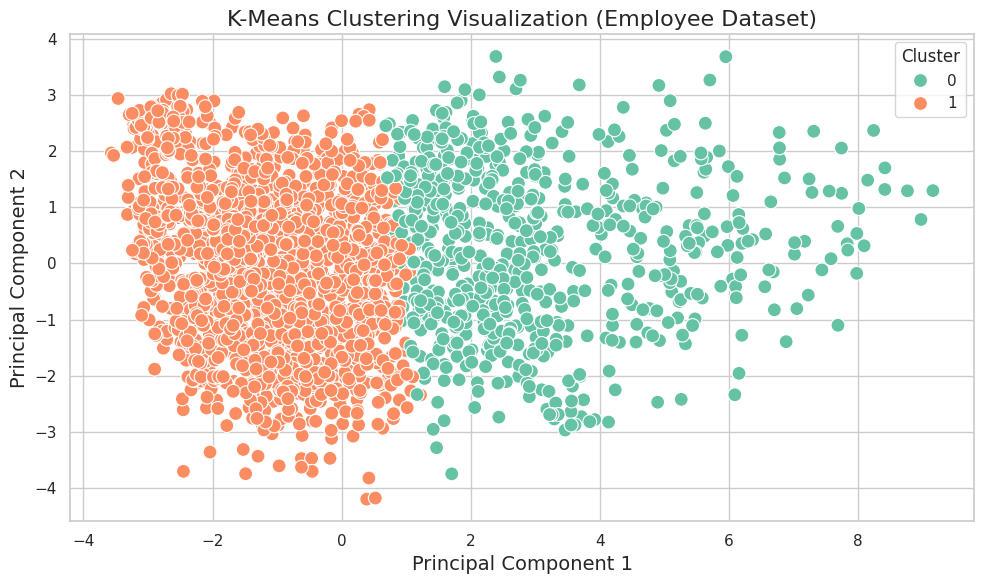

In [ ]:
# ==========================
# K-Means Clustering on Employee Attrition Dataset (Ignoring Target)
# ==========================

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from google.colab import files

# Step 2: Upload the dataset
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Step 3: Display the first few rows
print("\nFirst few rows of the dataset:")
print(df.head())

# Step 4: Encode any categorical columns (except 'Attrition')
for col in df.select_dtypes(include=['object']).columns:
    if col != 'Attrition':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

# Step 5: Remove target column ('Attrition') from clustering
if 'Attrition' in df.columns:
    X = df.drop('Attrition', axis=1)
else:
    X = df.copy()

# Step 6: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # 2 clusters (like yes/no attrition vibe)
cluster_labels = kmeans.fit_predict(X_scaled)

# Step 8: Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 9: Create a new DataFrame for plotting
df_plot = pd.DataFrame()
df_plot['PCA1'] = X_pca[:,0]
df_plot['PCA2'] = X_pca[:,1]
df_plot['Cluster'] = cluster_labels

# ==========================
# Step 10: Plot the Clusters
# ==========================

# Set a nice style
sns.set(style="whitegrid")

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_plot, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('K-Means Clustering Visualization (Employee Dataset)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


# **Final visualization**

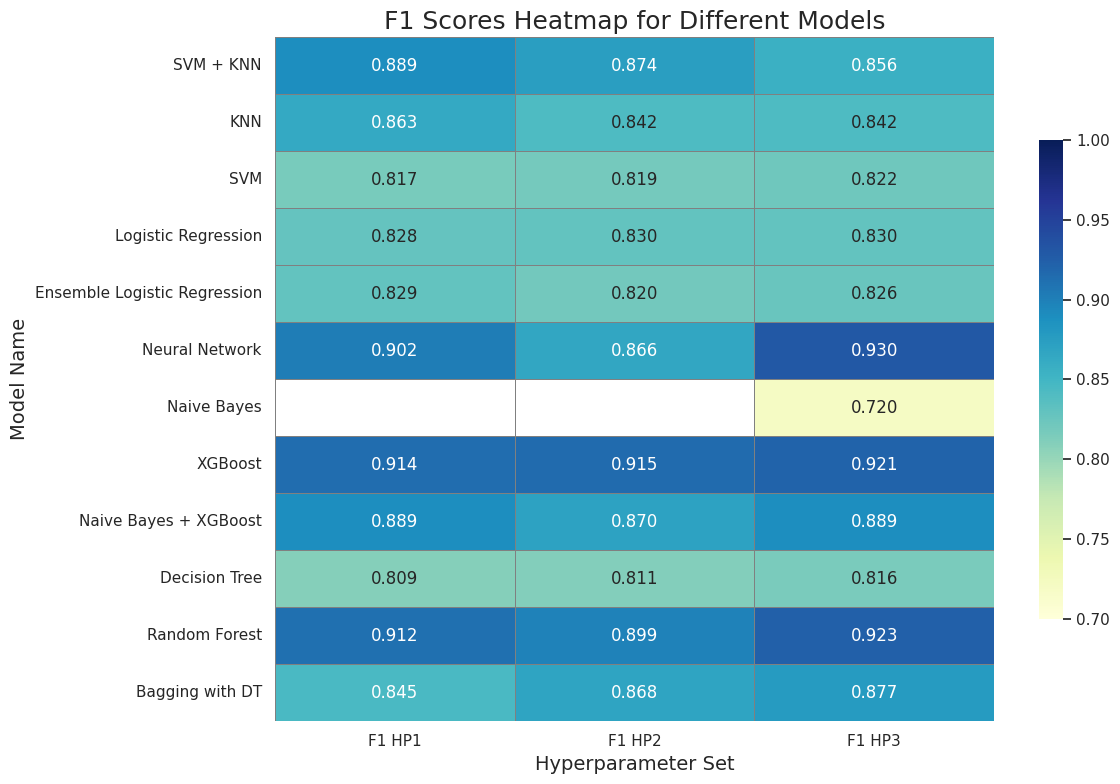

In [ ]:
# ==========================
# Heatmap for F1 Scores - Custom 0.7 to 1.0 Range, White for 0s
# ==========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create the data manually
data = {
    'Model Name': [
        'SVM + KNN', 'KNN', 'SVM', 'Logistic Regression', 'Ensemble Logistic Regression',
        'Neural Network', 'Naive Bayes', 'XGBoost', 'Naive Bayes + XGBoost',
        'Decision Tree', 'Random Forest', 'Bagging with DT'
    ],
    'F1 HP1': [0.889, 0.863, 0.817, 0.828, 0.829, 0.902, np.nan, 0.914, 0.889, 0.809, 0.912, 0.845],
    'F1 HP2': [0.874, 0.842, 0.819, 0.830, 0.820, 0.866, np.nan, 0.915, 0.870, 0.811, 0.899, 0.868],
    'F1 HP3': [0.856, 0.842, 0.822, 0.830, 0.826, 0.930, 0.720, 0.921, 0.889, 0.816, 0.923, 0.877]
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)

# Step 3: Set plot style
sns.set(style="white")

# Step 4: Set up figure
plt.figure(figsize=(12,8))

# Step 5: Create Heatmap
heatmap = sns.heatmap(
    df.set_index('Model Name'),
    annot=True,
    cmap='YlGnBu',           # Yellow-Green-Blue color palette
    fmt=".3f",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={"shrink": 0.7},
    vmin=0.7,                # Set lower limit of colorbar
    vmax=1.0,                # Set upper limit of colorbar
    mask=df.set_index('Model Name').isnull()  # Mask NaN values so they appear white
)

# Step 6: Titles and Labels
plt.title('F1 Scores Heatmap for Different Models', fontsize=18)
plt.xlabel('Hyperparameter Set', fontsize=14)
plt.ylabel('Model Name', fontsize=14)

# Step 7: Display
plt.tight_layout()
plt.show()


In [ ]:
# ==========================
# KNN with Normalization + 5-Fold Cross-Validation
# ==========================

# Step 1: Import required libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
from google.colab import files

# Step 2: Upload dataset
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)

# Step 3: Encode categorical columns
for col in df.select_dtypes(include='object').columns:
    if col != 'Attrition':
        df[col] = LabelEncoder().fit_transform(df[col])

# Step 4: Encode target column
if df['Attrition'].dtype == 'object':
    df['Attrition'] = LabelEncoder().fit_transform(df['Attrition'])

# Step 5: Split features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 6: Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: 5-Fold Stratified Cross Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 8: Metric containers
acc_list, prec_list, f1_list, auc_list = [], [], [], []

# Step 9: Cross-validation loop
for train_idx, test_idx in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    y_prob = knn.predict_proba(X_test)[:, 1]

    acc_list.append(accuracy_score(y_test, y_pred))
    prec_list.append(precision_score(y_test, y_pred))
    f1_list.append(f1_score(y_test, y_pred))
    auc_list.append(roc_auc_score(y_test, y_prob))

# Step 10: Print averaged results
print("\n📊 KNN Model Performance (5-Fold CV with Normalization):")
print(f"✅ Accuracy:  {np.mean(acc_list):.3f}")
print(f"✅ Precision: {np.mean(prec_list):.3f}")
print(f"✅ F1 Score:  {np.mean(f1_list):.3f}")
print(f"✅ AUC:       {np.mean(auc_list):.3f}")
